# Inclinations and trajectories

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Total-center-of-mass-(CoM)" data-toc-modified-id="Total-center-of-mass-(CoM)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Total center of mass (CoM)</a></span></li><li><span><a href="#Rotations-to-X',-Y',-Z'-coordinate-system" data-toc-modified-id="Rotations-to-X',-Y',-Z'-coordinate-system-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Rotations to X', Y', Z' coordinate system</a></span></li><li><span><a href="#Center-and-rotate-coordinates-for-each-galaxy" data-toc-modified-id="Center-and-rotate-coordinates-for-each-galaxy-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Center and rotate coordinates for each galaxy</a></span></li><li><span><a href="#Rotate-in-X',Y'-plane" data-toc-modified-id="Rotate-in-X',Y'-plane-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Rotate in X',Y' plane</a></span></li><li><span><a href="#Plot-trajectories-over-12-Gyr" data-toc-modified-id="Plot-trajectories-over-12-Gyr-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Plot trajectories over 12 Gyr</a></span></li><li><span><a href="#Separations" data-toc-modified-id="Separations-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Separations</a></span></li><li><span><a href="#Inclinations-of-galaxy-rotations" data-toc-modified-id="Inclinations-of-galaxy-rotations-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Inclinations of galaxy rotations</a></span></li><li><span><a href="#Orbit-angular-momentum-vectors" data-toc-modified-id="Orbit-angular-momentum-vectors-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Orbit angular momentum vectors</a></span></li></ul></div>

## Setup

In [1]:
# import modules
import numpy as np
from numpy.linalg import norm
import astropy.units as u
from astropy.constants import G
from numpy.linalg import norm
import pandas as pd

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams

%matplotlib inline

from galaxy.timecourse import TimeCourse
from galaxy.utilities import rotation_matrix_to_vector, z_rotation_matrix

In [2]:
tc = TimeCourse()

## Total center of mass (CoM)

These values will define the origin of the X',Y',Z' coordinate system at each time point

In [3]:
# position to center on
tot = tc.read_total_com_db()
total_com = np.array([tot[xi] for xi in ('x','y','z')])

# times for plotting
t = tot['t']

## Rotations to X', Y', Z' coordinate system

Assuming the coordinates already have the overall CoM at the origin, rotate the axes so that all three galaxy CoMs start in the X', Y' plane and the two large galaxies start on the X'-axis.

Start with a rotation matrix that puts the normal along the Z'-axis.

In [4]:
normal = tc.read_normals_db([0,0])
normal_t0 = np.array([normal[xi] for xi in ('x_hat','y_hat','z_hat')]).T[0]

In [5]:
R = rotation_matrix_to_vector(normal_t0)
R

array([[-0.62565695, -0.29495991, -0.72218561],
       [-0.29495991,  0.94648234, -0.13103367],
       [ 0.72218561,  0.13103367, -0.6791746 ]])

## Center and rotate coordinates for each galaxy

In [6]:
MW = tc.read_com_db('MW')
MW_original = np.array([MW[xi] for xi in ('x','y','z')])
MW_centered = MW_original - total_com
MW_rotated = R @ MW_centered

In [7]:
M31 = tc.read_com_db('M31')
M31_original = np.array([M31[xi] for xi in ('x','y','z')])
M31_centered = M31_original - total_com
M31_rotated = R @ M31_centered

In [8]:
M33 = tc.read_com_db('M33')
M33_original = np.array([M33[xi] for xi in ('x','y','z')])
M33_centered = M33_original - total_com
M33_rotated = R @ M33_centered

## Rotate in X',Y' plane

In [9]:
R_z = z_rotation_matrix(MW_rotated[:2,0], M31_rotated[:2,0])
R_z

-70.21872052654633


array([[-0.33843048, -0.9409914 , -0.        ],
       [ 0.9409914 , -0.33843048, -0.        ],
       [-0.        , -0.        , -1.        ]])

In [10]:
MW_rotated = R_z @ MW_rotated
M31_rotated = R_z @ M31_rotated
M33_rotated = R_z @ M33_rotated

## Plot trajectories over 12 Gyr

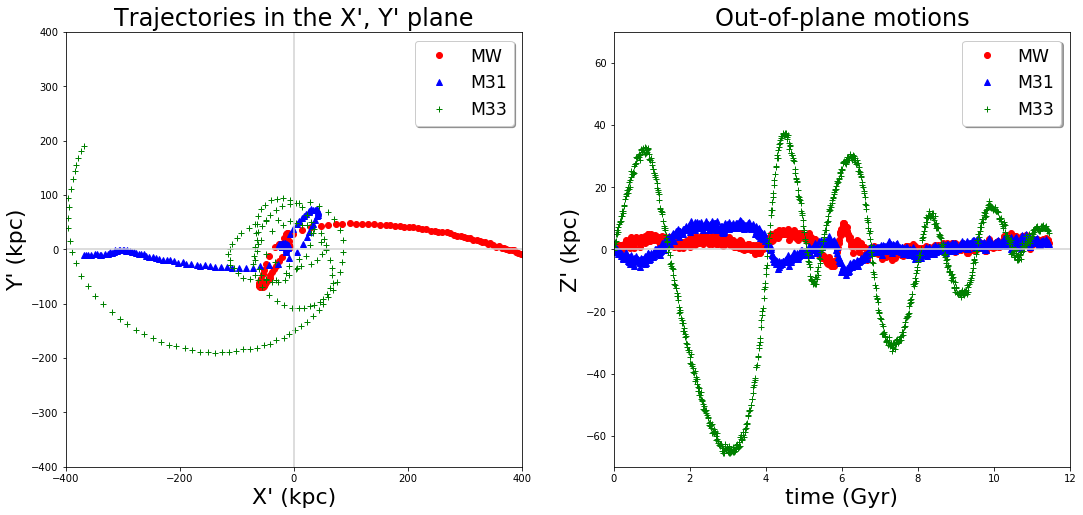

In [11]:
fig = plt.figure(figsize=(18,8))
subplots = (121, 122)

# set up the left subplot
ax0 = plt.subplot(121)

# add the curves
n = 5 # plot every n'th time point
ax0.plot(MW_rotated[0][::n], MW_rotated[1][::n], 'ro', label='MW')
ax0.plot(M31_rotated[0][::n], M31_rotated[1][::n], 'b^', label='M31')
ax0.plot(M33_rotated[0][::n], M33_rotated[1][::n], 'g+', label='M33')

ax0.plot((-400,400), (0,0), color='lightgray')
ax0.plot((0,0), (-400,400), color='lightgray')

ax0.legend(fontsize='xx-large', shadow=True)

# Add axis labels
ax0.set_xlabel("X' (kpc)", fontsize=22)
ax0.set_ylabel("Y' (kpc)", fontsize=22)

ax0.set_title("Trajectories in the X', Y' plane", fontsize=24)

#set axis limits
ax0.set_xlim(-400,400)
ax0.set_ylim(-400,400)

# set up the right subplot
ax1 = plt.subplot(122)

# add the curves
ax1.plot(t, MW_rotated[2], 'ro', label='MW')
ax1.plot(t, M31_rotated[2], 'b^', label='M31')
ax1.plot(t, M33_rotated[2], 'g+', label='M33')

ax1.plot((0, 12), (0,0), color='lightgray')

ax1.legend(fontsize='xx-large', shadow=True)

# Add axis labels
ax1.set_xlabel("time (Gyr)", fontsize=22)
ax1.set_ylabel("Z' (kpc)", fontsize=22)

ax1.set_title("Out-of-plane motions", fontsize=24)

#set axis limits
ax1.set_xlim(0,12)
ax1.set_ylim(-70, 70)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.savefig('trajectories.pdf', rasterized=True, dpi=350);

Redo these plots separately:

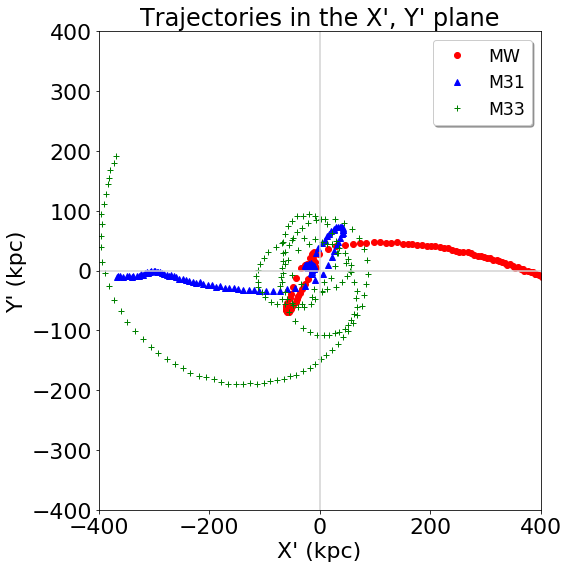

In [39]:
fig = plt.figure(figsize=(8,8))
ax0 = plt.subplot()

# add the curves
n = 5 # plot every n'th time point
ax0.plot(MW_rotated[0][::n], MW_rotated[1][::n], 'ro', label='MW')
ax0.plot(M31_rotated[0][::n], M31_rotated[1][::n], 'b^', label='M31')
ax0.plot(M33_rotated[0][::n], M33_rotated[1][::n], 'g+', label='M33')

ax0.plot((-400,400), (0,0), color='lightgray')
ax0.plot((0,0), (-400,400), color='lightgray')

ax0.legend(fontsize='xx-large', shadow=True)

# Add axis labels
ax0.set_xlabel("X' (kpc)", fontsize=22)
ax0.set_ylabel("Y' (kpc)", fontsize=22)

ax0.set_title("Trajectories in the X', Y' plane", fontsize=24)

#set axis limits
ax0.set_xlim(-400,400)
ax0.set_ylim(-400,400)

plt.tight_layout()
plt.savefig('traj_xy.pdf', rasterized=True, dpi=350);

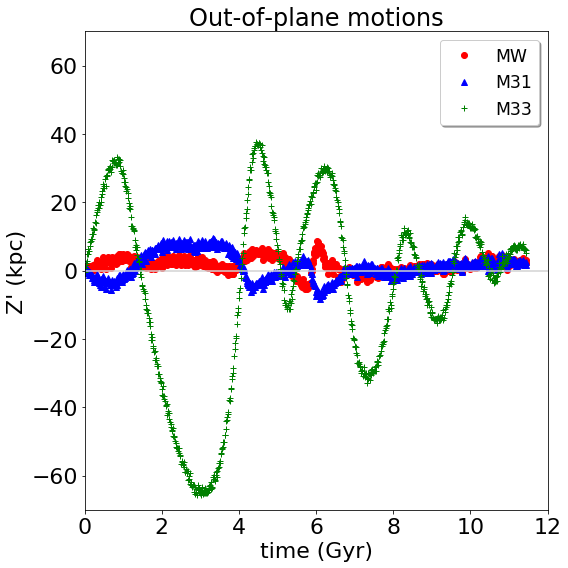

In [38]:
fig = plt.figure(figsize=(8,8))

ax1 = plt.subplot()

# add the curves
ax1.plot(t, MW_rotated[2], 'ro', label='MW')
ax1.plot(t, M31_rotated[2], 'b^', label='M31')
ax1.plot(t, M33_rotated[2], 'g+', label='M33')

ax1.plot((0, 12), (0,0), color='lightgray')

ax1.legend(fontsize='xx-large', shadow=True)

# Add axis labels
ax1.set_xlabel("time (Gyr)", fontsize=22)
ax1.set_ylabel("Z' (kpc)", fontsize=22)

ax1.set_title("Out-of-plane motions", fontsize=24)

#set axis limits
ax1.set_xlim(0,12)
ax1.set_ylim(-70, 70)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.tight_layout()
plt.savefig('traj_z.pdf', rasterized=True, dpi=350);

In [14]:
t[::5]

array([ 0.   ,  0.071,  0.143,  0.214,  0.286,  0.357,  0.429,  0.5  ,
        0.571,  0.643,  0.714,  0.786,  0.857,  0.929,  1.   ,  1.071,
        1.143,  1.214,  1.286,  1.357,  1.429,  1.5  ,  1.571,  1.643,
        1.714,  1.786,  1.857,  1.929,  2.   ,  2.071,  2.143,  2.214,
        2.286,  2.357,  2.429,  2.5  ,  2.571,  2.643,  2.714,  2.786,
        2.857,  2.929,  3.   ,  3.071,  3.143,  3.214,  3.286,  3.357,
        3.429,  3.5  ,  3.571,  3.643,  3.714,  3.786,  3.857,  3.929,
        4.   ,  4.071,  4.143,  4.214,  4.286,  4.357,  4.429,  4.5  ,
        4.571,  4.643,  4.714,  4.786,  4.857,  4.929,  5.   ,  5.071,
        5.143,  5.214,  5.286,  5.357,  5.429,  5.5  ,  5.571,  5.643,
        5.714,  5.786,  5.857,  5.929,  6.   ,  6.071,  6.143,  6.214,
        6.286,  6.357,  6.429,  6.5  ,  6.571,  6.643,  6.714,  6.786,
        6.857,  6.929,  7.   ,  7.071,  7.143,  7.214,  7.286,  7.357,
        7.429,  7.5  ,  7.571,  7.643,  7.714,  7.786,  7.857,  7.929,
      

## Separations

In [15]:
# relative positions
pos_MW_M31 = norm(MW_original - M31_original, axis=0)
pos_M33_M31 = norm(M33_original - M31_original, axis=0)

# velocities
vel_MW = np.array([MW[vxi] for vxi in ('vx','vy','vz')])
vel_M31 = np.array([M31[vxi] for vxi in ('vx','vy','vz')])
vel_M33 = np.array([M33[vxi] for vxi in ('vx','vy','vz')])

# relative velocities
vel_MW_M31 = norm(vel_MW - vel_M31, axis=0)
vel_M33_M31 = norm(vel_M33 - vel_M31, axis=0)

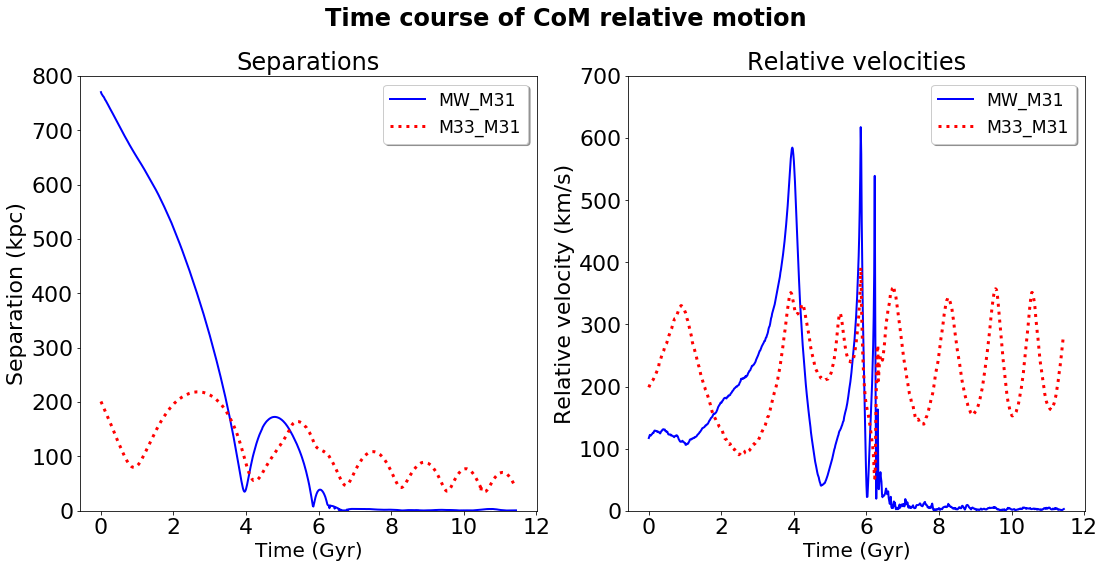

In [16]:
fig = plt.figure(figsize=(18,8))
subplots = (121, 122)

# set up the left subplot
ax0 = plt.subplot(121)

# add the curves
ax0.plot(t, pos_MW_M31, 'b-', lw=2, label='MW_M31')
ax0.plot(t, pos_M33_M31, 'r:', lw=3, label='M33_M31')

# Add labels and subplot title
ax0.set_xlabel('Time (Gyr)', fontsize=20)
ax0.set_ylabel('Separation (kpc)', fontsize=22)
ax0.legend(loc='upper right',fontsize='xx-large', shadow=True)
ax0.set_title('Separations', fontsize=24)

#set axis limits
ax0.set_ylim(0, 800)

# set up the right subplot
ax1 = plt.subplot(122)

# add the curves
ax1.plot(t, vel_MW_M31, 'b-', lw=2, label='MW_M31')
ax1.plot(t, vel_M33_M31, 'r:', lw=3, label='M33_M31')

#adjust tick label font size
label_size = 16
rcParams['xtick.labelsize'] = label_size 
rcParams['ytick.labelsize'] = label_size

# Add labels and subplot title
ax1.set_xlabel('Time (Gyr)', fontsize=20)
ax1.set_ylabel('Relative velocity (km/s)', fontsize=22)
ax1.legend(loc='upper right',fontsize='xx-large', shadow=True)
ax1.set_title('Relative velocities', fontsize=24)

#set axis limits
ax1.set_ylim(0, 700)

# Overall title
fig.suptitle(f'Time course of CoM relative motion', y=1.0, fontsize=24, weight='bold')
plt.savefig('rel_motion.pdf', rasterized=True, dpi=350);

Redo these plots separately:

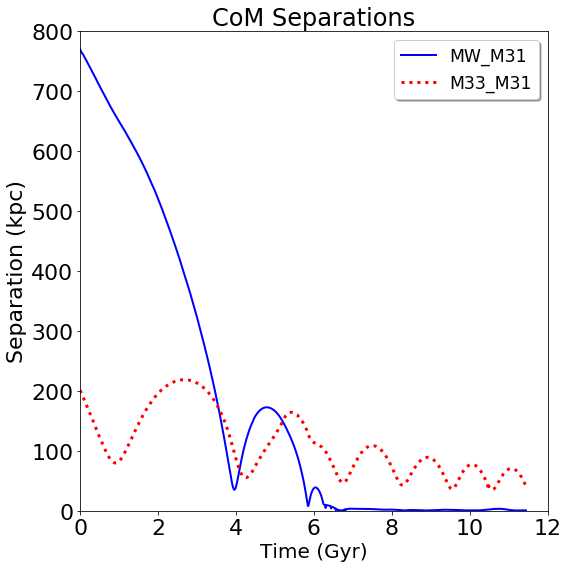

In [40]:
fig = plt.figure(figsize=(8,8))
ax0 = plt.subplot()

# add the curves
ax0.plot(t, pos_MW_M31, 'b-', lw=2, label='MW_M31')
ax0.plot(t, pos_M33_M31, 'r:', lw=3, label='M33_M31')

# Add labels and subplot title
ax0.set_xlabel('Time (Gyr)', fontsize=20)
ax0.set_ylabel('Separation (kpc)', fontsize=22)
ax0.legend(loc='upper right',fontsize='xx-large', shadow=True)
ax0.set_title('CoM Separations', fontsize=24)

#set axis limits
ax0.set_xlim(0, 12)
ax0.set_ylim(0, 800)

plt.tight_layout()
plt.savefig('rel_sep.pdf', rasterized=True, dpi=350);

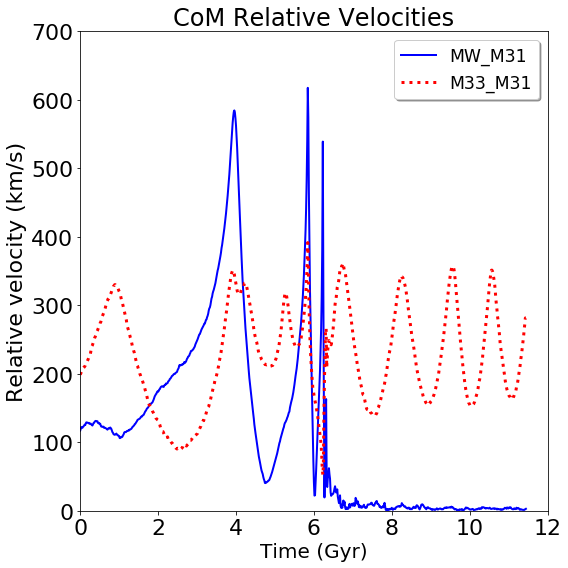

In [41]:
fig = plt.figure(figsize=(8,8))
ax1 = plt.subplot()

# add the curves
ax1.plot(t, vel_MW_M31, 'b-', lw=2, label='MW_M31')
ax1.plot(t, vel_M33_M31, 'r:', lw=3, label='M33_M31')

#adjust tick label font size
label_size = 16
rcParams['xtick.labelsize'] = label_size 
rcParams['ytick.labelsize'] = label_size

# Add labels and subplot title
ax1.set_xlabel('Time (Gyr)', fontsize=20)
ax1.set_ylabel('Relative velocity (km/s)', fontsize=22)
ax1.legend(loc='upper right',fontsize='xx-large', shadow=True)
ax1.set_title('CoM Relative Velocities', fontsize=24)

#set axis limits
ax1.set_xlim(0, 12)
ax1.set_ylim(0, 700)

plt.tight_layout()

plt.savefig('rel_vel.pdf', rasterized=True, dpi=350);

In [19]:
seps_df = pd.DataFrame()
seps_df['t'] = t
seps_df['MW_M31'] = pos_MW_M31
seps_df['M33_M31'] = pos_M33_M31
seps_df[270:300]

,t,MW_M31,M33_M31
270,3.857,60.528416,120.201607
271,3.871,55.281307,116.986664
272,3.886,50.296486,113.655983
273,3.900,45.640907,110.294640
274,3.914,41.563671,106.905060
275,3.929,38.289310,103.382965
276,3.943,36.073292,99.941505
277,3.957,35.121834,96.328949
278,3.971,35.556759,92.865166
279,3.986,37.344391,89.408432


## Inclinations of galaxy rotations

First define a couple of functions to calculate angles:

In [20]:
def inclination_angle_to_plane(L_1):
    L_hat_1 = np.array([L_1[xi] for xi in ('x_hat','y_hat','z_hat')])
    thetas = np.arccos(np.dot(normal_t0, L_hat_1)) * 180 / np.pi # to degrees
    return thetas

In [21]:
def mutual_inclination_angles(L_1, L_2):
    L_hat_1 = np.array([L_1[xi] for xi in ('x_hat','y_hat','z_hat')])
    L_hat_2 = np.array([L_2[xi] for xi in ('x_hat','y_hat','z_hat')])
    dots = np.array([np.dot(L_hat_1[:,i], L_hat_2[:,i]) for i in range(L_hat_1.shape[1])])
    thetas = np.arccos(dots) * 180 / np.pi # to degrees
    return thetas

Do the calculations:

In [22]:
# Angles of angular momentum vection to plane normal
L_MW = tc.read_angmom_db('MW')
theta_MW = inclination_angle_to_plane(L_MW)
L_M31 = tc.read_angmom_db('M31')
theta_M31 = inclination_angle_to_plane(L_M31)
L_M33 = tc.read_angmom_db('M33')
theta_M33 = inclination_angle_to_plane(L_M33)

# angles between pairs of galaxies
theta_MW_M31 = mutual_inclination_angles(L_MW, L_M31)
theta_M33_M31 = mutual_inclination_angles(L_M33, L_M31)

In [23]:
theta_MW_M31[270:340], theta_MW_M31[277]

(array([54.096977, 53.899105, 53.68714 , 53.5416  , 53.364513, 53.094784,
        52.776623, 52.394726, 51.962437, 51.240704, 50.66681 , 49.896675,
        49.333355, 48.67228 , 48.179432, 47.95832 , 47.66703 , 47.429405,
        47.34136 , 47.227425, 47.099434, 46.996033, 46.935593, 46.8539  ,
        46.743153, 46.71026 , 46.532497, 46.488667, 46.502567, 46.47895 ,
        46.419422, 46.37496 , 46.38675 , 46.249928, 46.161976, 46.209457,
        46.14537 , 46.078114, 46.118587, 45.97007 , 45.923912, 45.923992,
        45.756355, 45.64243 , 45.519695, 45.447624, 45.317627, 45.312626,
        45.26974 , 44.99998 , 44.89    , 44.855648, 44.709812, 44.58238 ,
        44.39964 , 44.24539 , 44.217796, 44.185337, 44.106857, 43.85802 ,
        43.708057, 43.69379 , 43.656456, 43.500034, 43.567993, 43.39672 ,
        43.304745, 43.21804 , 43.20039 , 43.132378], dtype=float32), 52.394726)

Plots:

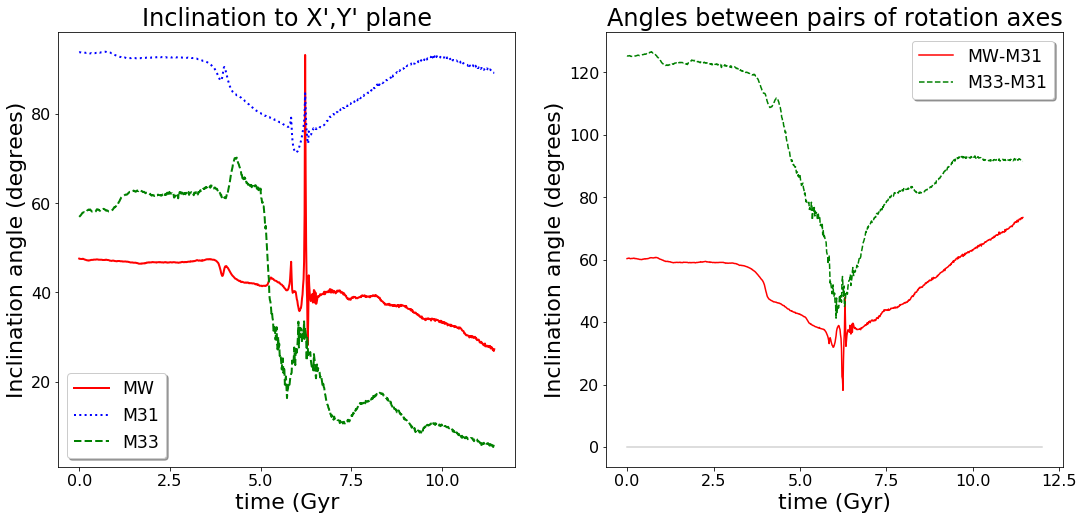

In [24]:
fig = plt.figure(figsize=(18,8))
subplots = (121, 122)

# set up the left subplot
ax0 = plt.subplot(121)

# add the curves
# n = 5 # plot every n'th time point
ax0.plot(t, theta_MW, 'r-', label='MW', lw=2)
ax0.plot(t, theta_M31, 'b:', label='M31', lw=2)
ax0.plot(t, theta_M33, 'g--', label='M33', lw=2)

ax0.legend(fontsize='xx-large', shadow=True)

# Add axis labels
ax0.set_xlabel("time (Gyr", fontsize=22)
ax0.set_ylabel("Inclination angle (degrees)", fontsize=22)

ax0.set_title("Inclination to X',Y' plane", fontsize=24)

# set up the right subplot
ax1 = plt.subplot(122)

# add the curves
ax1.plot(t, theta_MW_M31, 'r-', label='MW-M31')
ax1.plot(t, theta_M33_M31, 'g--', label='M33-M31')

ax1.plot((0, 12), (0,0), color='lightgray')

ax1.legend(fontsize='xx-large', shadow=True)

# Add axis labels
ax1.set_xlabel("time (Gyr)", fontsize=22)
ax1.set_ylabel("Inclination angle (degrees)", fontsize=22)

ax1.set_title("Angles between pairs of rotation axes", fontsize=24)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.savefig('inclinations.pdf', rasterized=True, dpi=350);

Redo as separate plots:

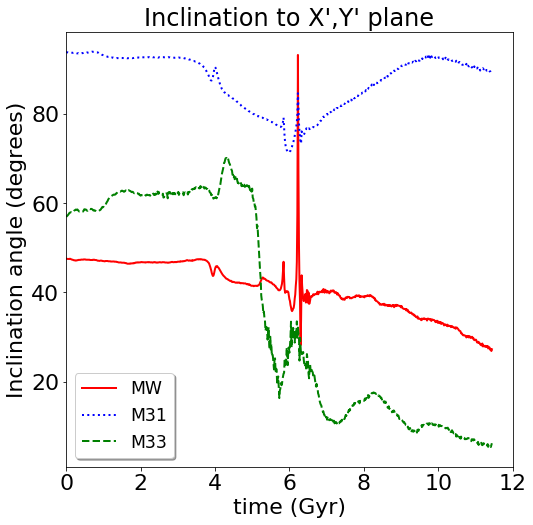

In [25]:
fig = plt.figure(figsize=(8,8))
ax0 = plt.subplot()

# add the curves
# n = 5 # plot every n'th time point
ax0.plot(t, theta_MW, 'r-', label='MW', lw=2)
ax0.plot(t, theta_M31, 'b:', label='M31', lw=2)
ax0.plot(t, theta_M33, 'g--', label='M33', lw=2)

ax0.legend(fontsize='xx-large', shadow=True)

# Add axis labels
ax0.set_xlabel("time (Gyr)", fontsize=22)
ax0.set_ylabel("Inclination angle (degrees)", fontsize=22)

ax0.set_xlim(0,12)

ax0.set_title("Inclination to X',Y' plane", fontsize=24)
#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.savefig('inclinations_xy.pdf', rasterized=True, dpi=350);

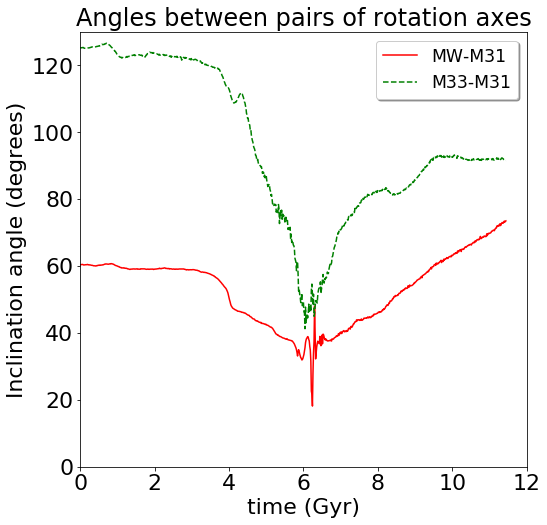

In [26]:
fig = plt.figure(figsize=(8,8))
ax1 = plt.subplot()

# add the curves
ax1.plot(t, theta_MW_M31, 'r-', label='MW-M31')
ax1.plot(t, theta_M33_M31, 'g--', label='M33-M31')

# ax1.plot((0, 12), (0,0), color='lightgray')

ax1.legend(fontsize='xx-large', shadow=True)

# Add axis labels
ax1.set_xlabel("time (Gyr)", fontsize=22)
ax1.set_ylabel("Inclination angle (degrees)", fontsize=22)

ax1.set_xlim(0,12)
ax1.set_ylim(0,130)

ax1.set_title("Angles between pairs of rotation axes", fontsize=24)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.savefig('inclinations_mutual.pdf', rasterized=True, dpi=350);

## Orbit angular momentum vectors

Refresh the $\hat{L}$ list for each disk:

In [27]:
L_MW = tc.read_angmom_db('MW')
L_M31 = tc.read_angmom_db('M31')

In [28]:
L_MW[0], L_M31[0], L_MW.dtype

(('MW ', 0, 0., -0.006, -0.004, -1., 4.721e+08),
 ('M31', 0, 0., -0.414, -0.767, -0.489, 1.344e+09),
 dtype([('gal', '<U3'), ('snap', '<u2'), ('t', '<f4'), ('x_hat', '<f4'), ('y_hat', '<f4'), ('z_hat', '<f4'), ('l_mag', '<f4')]))

In [29]:
Lhat_MW = np.array([L_MW[xi] for xi in ('x_hat','y_hat','y_hat')])
Lhat_M31 = np.array([L_M31[xi] for xi in ('x_hat','y_hat','y_hat')])

CoM positions and velocities:

In [30]:
MW = tc.read_com_db('MW')
M31 = tc.read_com_db('M31')
MW[0], MW.dtype

(('MW ', 0, 0., -0.89, 2.41, -1.42, -0.6, 3.06, -1.06),
 dtype([('gal', '<U3'), ('snap', '<u2'), ('t', '<f4'), ('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('vx', '<f4'), ('vy', '<f4'), ('vz', '<f4')]))

Relative positions and velocities:

In [32]:
MW_xyz = np.array([MW[xi] for xi in ('x','y','z')])
MW_vxyz = np.array([MW[vxi] for vxi in ('vx','vy','vz')])

M31_xyz = np.array([M31[xi] for xi in ('x','y','z')])
M31_vxyz = np.array([M31[vxi] for vxi in ('vx','vy','vz')])

rel_xyz = M31_xyz - MW_xyz
rel_vxyz = M31_vxyz - MW_vxyz

Orientation of relative (orbital) angular momentum vector:

In [33]:
# ignore mass, we only want a unit vector
L_rel = np.cross(rel_xyz, rel_vxyz, axis=0)
L_mag_rel = norm(L_rel, axis=0)
Lhat_rel = L_rel / L_mag_rel

In [34]:
dots_MW = np.array([np.dot(Lhat_rel[:,i], Lhat_MW[:,i]) for i in range(Lhat_rel.shape[1])])
thetas_MW = np.arccos(dots_MW) * 180 / np.pi # to degrees

dots_M31 = np.array([np.dot(Lhat_rel[:,i], Lhat_M31[:,i]) for i in range(Lhat_rel.shape[1])])
thetas_M31 = np.arccos(dots_M31) * 180 / np.pi # to degrees

/home/colin/.pyenv/versions/miniconda3-4.2.12/envs/400b/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in arccos
  """


In [35]:
print(thetas_MW[0], thetas_M31[0]) # start
print(thetas_MW[278], thetas_M31[278]) # near first pericenter
print(thetas_MW[400], thetas_M31[400]) # near final approach

89.94022 56.429665
82.513626 88.4146
73.56521 63.992157


In [36]:
theta_MW_M31[0], theta_MW_M31[278], theta_MW_M31[400]

(60.359787, 51.962437, 37.431076)

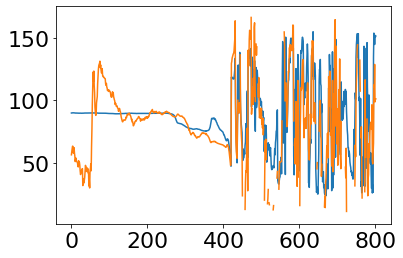

In [37]:
plt.plot(thetas_MW)
plt.plot(thetas_M31)